In [1]:
import nltk
import os

# Create a directory for NLTK data in your project folder (more likely to work)
nltk_data_dir = os.path.join(os.getcwd(), 'nltk_data')
os.makedirs(nltk_data_dir, exist_ok=True)

# Download with the specified path
nltk.download('punkt', download_dir=nltk_data_dir)
nltk.download('stopwords', download_dir=nltk_data_dir)

# Add this directory to NLTK's search path
nltk.data.path.append(nltk_data_dir)

print(f"NLTK data downloaded to: {nltk_data_dir}")
print(f"NLTK search paths: {nltk.data.path}")

NLTK data downloaded to: d:\ML-Ops\pipeline\experiments\nltk_data
NLTK search paths: ['C:\\Users\\Admin/nltk_data', 'd:\\ML-Ops\\pipeline\\dvc_pipeline\\nltk_data', 'd:\\ML-Ops\\pipeline\\dvc_pipeline\\share\\nltk_data', 'd:\\ML-Ops\\pipeline\\dvc_pipeline\\lib\\nltk_data', 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'd:\\ML-Ops\\pipeline\\experiments\\nltk_data']


[nltk_data] Downloading package punkt to d:\ML-
[nltk_data]     Ops\pipeline\experiments\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to d:\ML-
[nltk_data]     Ops\pipeline\experiments\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import nltk
import string

In [3]:

# Download necessary NLTK resources - make sure these complete successfully
try:
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    print("NLTK resources downloaded successfully")
except Exception as e:
    print(f"Error downloading NLTK resources: {e}")
    print("Try running these commands separately first:")
    print("import nltk")
    print("nltk.download('stopwords')")
    print("nltk.download('punkt')")

NLTK resources downloaded successfully


In [4]:
# Read the dataset
df = pd.read_csv(r"D:\ML-Ops\pipeline\experiments\spam.csv")

In [5]:
# Display first few rows
print("Dataset head:")
print(df.head())

Dataset head:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [6]:
# Remove unnecessary columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
print("\nAfter dropping unnecessary columns:")
print(df.head())


After dropping unnecessary columns:
     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [7]:
# Rename columns for clarity
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
print("\nAfter renaming columns:")
print(df.head())


After renaming columns:
  target                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [8]:

# Encode the target variable (ham/spam)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
print("\nAfter encoding target variable:")
print(df.head())


After encoding target variable:
   target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...


In [9]:

# Check for duplicates
print(f"\nNumber of duplicates: {df.duplicated().sum()}")
print(f"Total rows before deduplication: {len(df)}")


Number of duplicates: 403
Total rows before deduplication: 5572


In [10]:
# Remove duplicates
df = df.drop_duplicates(keep='first')
print(f"Total rows after deduplication: {len(df)}")

Total rows after deduplication: 5169


In [11]:
# Initialize stemmer outside the function
ps = PorterStemmer()

In [12]:

# Text preprocessing function
def transform_text(text):
    try:
        # Lowercase
        text = text.lower()
        
        # Tokenization - using try/except to handle potential errors
        try:
            text = nltk.word_tokenize(text)
        except LookupError:
            # Fallback tokenization if punkt is not available
            text = text.split()
            print("Used fallback tokenization. Please ensure 'punkt' is downloaded.")
        
        # Remove special characters and keep only alphanumeric
        y = []
        for i in text:
            if i.isalnum():
                y.append(i)
        
        # Remove stopwords and punctuation
        text = y[:]
        y.clear()
        
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
        
        # Stemming
        text = y[:]
        y.clear()
        for i in text:
            y.append(ps.stem(i))
        
        return " ".join(y)
    except Exception as e:
        print(f"Error in transform_text: {e}")
        return text  # Return original text if transformation fails

In [13]:
# Test transformation function with error handling
print("\nTesting text transformation function:")
sample_text = 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
transformed = transform_text(sample_text)
print(f"Original: {sample_text}")
print(f"Transformed: {transformed}")


Testing text transformation function:
Used fallback tokenization. Please ensure 'punkt' is downloaded.
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Transformed: go jurong avail bugi n great world la e cine got amor


In [14]:
# Apply transformation to all text with progress indicator
print("\nTransforming all text data...")
df['transformed_text'] = df['text'].apply(transform_text)
print("Text transformation complete.")
print(df.head())


Transforming all text data...
Used fallback tokenization. Please ensure 'punkt' is downloaded.
Used fallback tokenization. Please ensure 'punkt' is downloaded.
Used fallback tokenization. Please ensure 'punkt' is downloaded.
Used fallback tokenization. Please ensure 'punkt' is downloaded.
Used fallback tokenization. Please ensure 'punkt' is downloaded.
Used fallback tokenization. Please ensure 'punkt' is downloaded.
Used fallback tokenization. Please ensure 'punkt' is downloaded.
Used fallback tokenization. Please ensure 'punkt' is downloaded.
Used fallback tokenization. Please ensure 'punkt' is downloaded.
Used fallback tokenization. Please ensure 'punkt' is downloaded.
Used fallback tokenization. Please ensure 'punkt' is downloaded.
Used fallback tokenization. Please ensure 'punkt' is downloaded.
Used fallback tokenization. Please ensure 'punkt' is downloaded.
Used fallback tokenization. Please ensure 'punkt' is downloaded.
Used fallback tokenization. Please ensure 'punkt' is downlo

In [15]:
# Feature extraction
print("\nExtracting features using TF-IDF...")
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values
print(f"Feature extraction complete. X shape: {X.shape}")


Extracting features using TF-IDF...
Feature extraction complete. X shape: (5169, 500)


In [16]:

# Split data into training and testing sets
print("\nSplitting data into training and testing sets...")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)
print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")


Splitting data into training and testing sets...
Training set size: 4135, Testing set size: 1034


In [17]:
# Import classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [18]:
# Initialize classifiers
print("\nInitializing classifiers...")
svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)



Initializing classifiers...


In [19]:

# Create a dictionary of classifiers
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}


In [20]:

# Function to train and evaluate classifiers
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    print(f"Training {type(clf).__name__}...", end="")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    print(f" done. Accuracy: {accuracy:.4f}, Precision: {precision:.4f}")
    return accuracy, precision


In [21]:
# Train and evaluate each classifier
print("\nTraining and evaluating classifiers:")
accuracy_scores = []
precision_scores = []
classifier_names = []

for name, clf in clfs.items():
    try:
        current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)
        classifier_names.append(name)
    except Exception as e:
        print(f"Error with {name} classifier: {e}")


Training and evaluating classifiers:
Training SVC... done. Accuracy: 0.9613, Precision: 0.9083
Training KNeighborsClassifier... done. Accuracy: 0.9246, Precision: 0.9545
Training MultinomialNB... done. Accuracy: 0.9652, Precision: 0.9397
Training DecisionTreeClassifier... done. Accuracy: 0.9352, Precision: 0.8660
Training LogisticRegression... done. Accuracy: 0.9613, Precision: 0.9455
Training RandomForestClassifier... done. Accuracy: 0.9681, Precision: 0.9339
Training AdaBoostClassifier... done. Accuracy: 0.9246, Precision: 0.8846
Training BaggingClassifier... done. Accuracy: 0.9584, Precision: 0.8800
Training ExtraTreesClassifier... done. Accuracy: 0.9691, Precision: 0.9274
Training GradientBoostingClassifier... done. Accuracy: 0.9478, Precision: 0.9375
Training XGBClassifier... done. Accuracy: 0.9642, Precision: 0.9720



Generating performance visualizations...


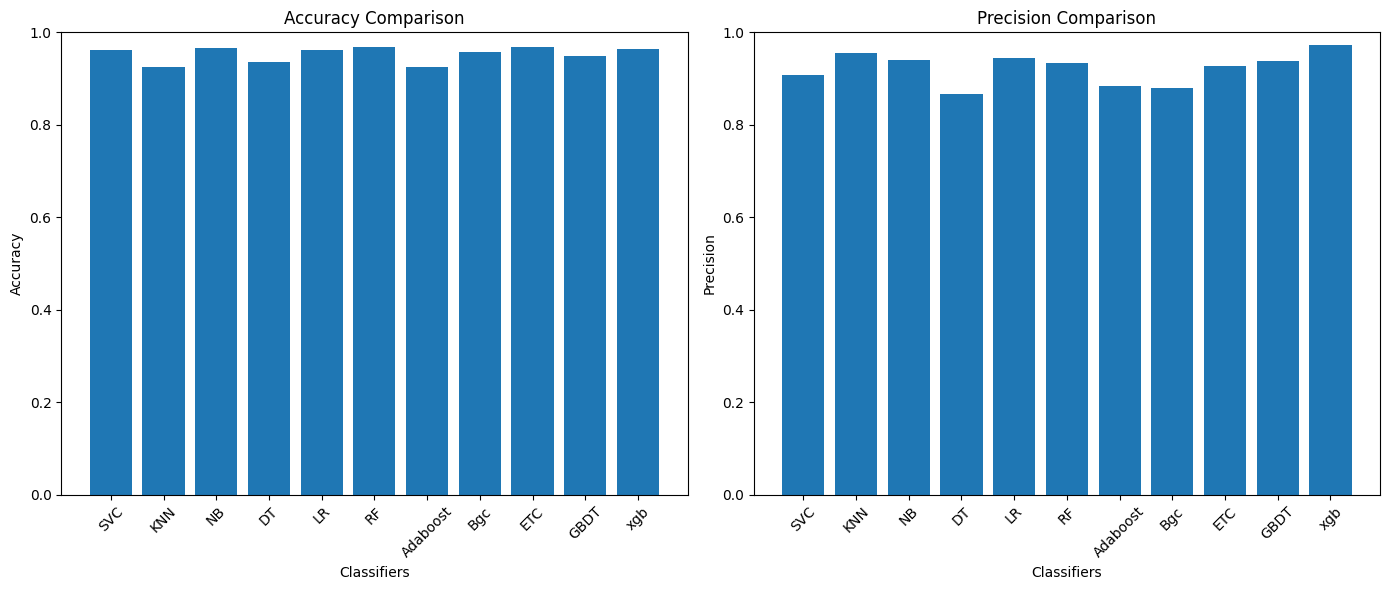

In [22]:
# Visualize results
print("\nGenerating performance visualizations...")
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.bar(classifier_names, accuracy_scores)
plt.title('Accuracy Comparison')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim([0, 1])

plt.subplot(1, 2, 2)
plt.bar(classifier_names, precision_scores)
plt.title('Precision Comparison')
plt.xlabel('Classifiers')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.ylim([0, 1])

plt.tight_layout()
plt.show()

In [23]:
# Find the best performing model
best_accuracy_idx = np.argmax(accuracy_scores)
best_precision_idx = np.argmax(precision_scores)

print("\nModel Evaluation Results:")
print(f"Best model by accuracy: {classifier_names[best_accuracy_idx]} with accuracy: {accuracy_scores[best_accuracy_idx]:.4f}")
print(f"Best model by precision: {classifier_names[best_precision_idx]} with precision: {precision_scores[best_precision_idx]:.4f}")


Model Evaluation Results:
Best model by accuracy: ETC with accuracy: 0.9691
Best model by precision: xgb with precision: 0.9720


In [24]:
# Save the best model
import pickle
best_model_name = classifier_names[best_accuracy_idx]
best_model = clfs[best_model_name]

print(f"\nSaving the best model ({best_model_name})...")
try:
    with open('spam_detection_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    with open('tfidf_vectorizer.pkl', 'wb') as f:
        pickle.dump(tfidf, f)
    print("Model and vectorizer saved successfully.")
except Exception as e:
    print(f"Error saving model: {e}")


Saving the best model (ETC)...
Model and vectorizer saved successfully.


In [25]:

# Function to predict with the saved model
def predict_spam(text, model, vectorizer):
    # Transform the text
    transformed = transform_text(text)
    # Vectorize
    vector = vectorizer.transform([transformed]).toarray()
    # Predict
    prediction = model.predict(vector)[0]
    return "Spam" if prediction == 1 else "Ham (Not Spam)"

In [26]:
# Test the model with a sample message
sample_sms = "URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"
print(f"\nTesting model with sample message:")
print(f"Message: {sample_sms}")
print(f"Prediction: {predict_spam(sample_sms, best_model, tfidf)}")

print("\nSpam Detection Model Pipeline Complete!")


Testing model with sample message:
Message: URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
Used fallback tokenization. Please ensure 'punkt' is downloaded.
Prediction: Spam

Spam Detection Model Pipeline Complete!
